### Логистическая регрессия

In [1]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

### Стаднартизация

In [2]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

### Инициализация параметров

Наборы данных всегда многомерны. При любых вычислениях нам придется использовать матрицы. Так, для входных данных мы имеем дело с двумя матрицами. Первая - для векторов признаков, вторая - для параметров или весов. Первая матрица имеет размерность mxn, где m - количество наблюдений, а n - размерность наблюдений. Вторая матрица имеет размерность nx1. Здесь мы добавим в матрицу векторов признаков столбец смещения, состоящий из единиц, а в вектор веса - соответствующий параметр. Смещение важно для того, чтобы сделать модель более гибкой

In [ ]:
 def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X

Сигмоида

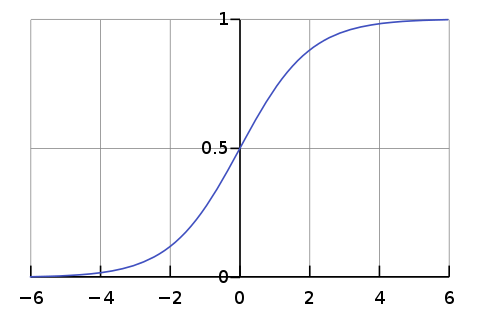

Вместо x подставляем линейное уравнение.

In [3]:
def sigmoid(self,z):
        sig = 1/(1+e**(-z))
        return sig

В приведенном выражении z - это точечное произведение матрицы mxn, содержащей наблюдения, и матрицы весов nx1

функция потерь - это функция, которая описывает, насколько сильно вычисленное значение отклоняется от фактического. В линейной регрессии в качестве функции затрат используется наименьшая квадратичная ошибка. Однако функция наименьшей квадратичной ошибки для логистической регрессии является невыпуклой. При выполнении градиентного спуска вероятность того, что мы застрянем в локальном минимуме, возрастает. Поэтому в качестве функции затрат мы используем log loss.

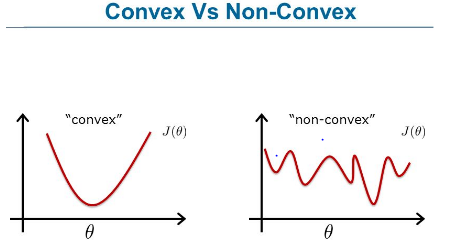

### Формула дает функцию стоимости для логистической регрессии

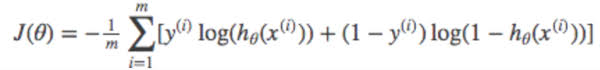

Где hx = сигмоидальная функция, которую мы использовали ранее

In [4]:
def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y) 
            return cost

Градиентный спуск

Следующим шагом является градиентный спуск. Градиентный спуск - это алгоритм оптимизации, который отвечает за обучение оптимально подходящих параметров. Что же представляют собой градиенты? Градиенты - это вектор производных 1-го порядка от функции стоимости. Это направление наиболее крутого подъема или максимума функции. При градиентном спуске мы движемся в направлении, противоположном градиентам. Мы будем обновлять веса на каждой итерации до сходимости

Продифференцировав функцию стоимости, получим выражение градиентного спуска:

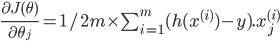

или 

Это векторная форма выражения градиентного спуска, которую мы будем использовать в нашем коде

In [5]:
def fit(self,X,y,alpha=0.001,iter=100):
        params,X = self.initialize(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            params = params - alpha * dot(X.T, self.sigmoid(dot(X,params)) - np.reshape(y,(len(y),1)))
            cost_list[i] = cost(params)
        self.params = params
        return cost_list

Все, что мы сделали до этого, предназначено для этого шага. Мы обучили модель на обучающем наборе данных, и теперь будем использовать полученные параметры для прогнозирования невидимых данных

In [6]:
def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

f1 score

In [7]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

### Создание единого класса для Лог. регрессии

In [12]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [14]:
X,y = make_classification(n_features=4)

In [29]:
from sklearn.model_selection import train_test_split  
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

### Тест

In [30]:
standardize(X_tr)
standardize(X_te)
obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print('f1 for train: ', f1_score_tr)
print('f1 for test: ', f1_score_te)

f1 for train:  0.8695652173913043
f1 for test:  0.8571428571428571


In [31]:
from sklearn.metrics import classification_report


In [36]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         8

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10



### Сравнение с лог. регрессией из sklearn

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

0.9090909090909091
